In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
email = pd.read_csv("emails_processados.csv")

In [3]:
email.drop('Unnamed: 0', axis='columns', inplace=True)

In [4]:
email

,subject,from,date,to,label,thread,dayofweek,timeofday,year,month
0,=?UTF-8?q?Voc=C3=AA_tem_que_ter_estes_itens_em...,offers@wish.com,2021-02-26 11:57:48-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1692770206194795587,Friday,11.963333,2021,February
1,=?UTF-8?Q?=E3=80=90E-Pal=E3=80=91?=,official@epal.gg,2021-03-06 19:56:44-03:00,viniapnm@gmail.com,inbox,1693525113471893522,Saturday,19.945556,2021,March
2,DSCO is now available!,vsco@official.vsco.co,2021-02-28 21:23:21-03:00,viniapnm@gmail.com,inbox,1692992869753561945,Sunday,21.389167,2021,February
3,=?UTF-8?q?=E2=9A=A1=F0=9F=94=8C_Todo_o_materia...,offers@wish.com,2021-04-24 11:28:52-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1697932412812193275,Saturday,11.481111,2021,April
4,=?UTF-8?q?=F0=9F=8E=89_Confira_o_que_acabou_de...,offers@wish.com,2021-02-04 10:19:29-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1690770887097317107,Thursday,10.324722,2021,February
...,...,...,...,...,...,...,...,...,...,...
1154,=?UTF-8?q?Fique_confort=C3=A1vel_em_um_dos_nos...,offers@wish.com,2019-12-16 10:19:47-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1653082570994743628,Monday,10.329722,2019,December
1155,=?UTF-8?q?Voc=C3=AA_j=C3=A1_viu_a_nova_m=C3=A1...,offers@wish.com,2020-11-06 18:56:40-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1682649698556022420,Friday,18.944444,2020,November
1156,=?UTF-8?q?=F0=9F=92=A1=F0=9F=95=AF;=EF=B8=8F_A...,offers@wish.com,2020-10-27 11:43:35-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1681716481326820081,Tuesday,11.726389,2020,October
1157,"=?UTF-8?q?60%,_70%_ou_80%_de_desconto_em_bolsa...",offers@wish.com,2019-08-13 11:42:16-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1641763136745729943,Tuesday,11.704444,2019,August


# 1-

In [53]:
anos = email["year"].value_counts()
mes = email["month"].value_counts()
dia = email["dayofweek"].value_counts()

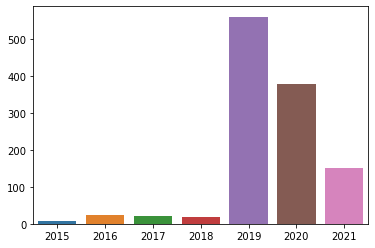

In [54]:
barra_anos = sns.barplot(x=anos.index, y=anos.values)

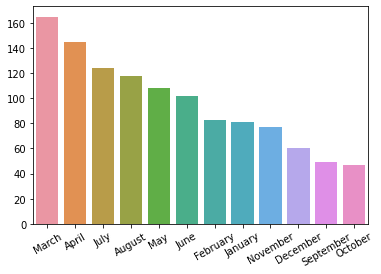

In [52]:
barra_mes = sns.barplot(x=mes.index, y=mes.values)
barra_mes = barra_mes.set_xticklabels(barra_mes.get_xticklabels(), rotation=30)

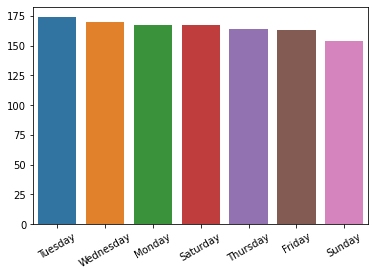

In [57]:
barra_dia = sns.barplot(x=dia.index, y=dia.values)
barra_dia = barra_dia.set_xticklabels(barra_dia.get_xticklabels(), rotation=30)

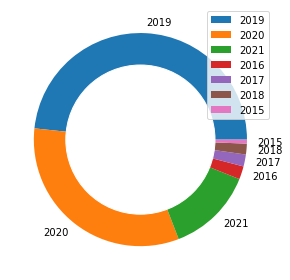

In [37]:
wedges, texts  = plt.pie(anos, labels=anos.index)
circulo=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circulo)

plt.legend(wedges, anos.index)
plt.tight_layout()

plt.show()

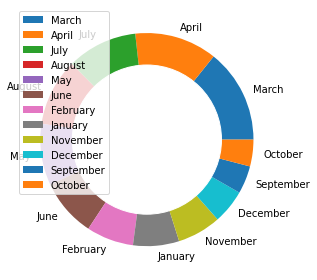

In [47]:
wedges, texts  = plt.pie(mes, labels=mes.index)
circulo=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circulo)

plt.legend(wedges, mes.index)
plt.tight_layout()

plt.show()

In [6]:
email.groupby("year")["month"].value_counts().to_frame()

month
year month           
2015 May            2
     April          1
     August         1
     December       1
     July           1
     November       1
2016 June           4
     May            4
     August         3
     March          3
     September      3
     July           2
     October        2
     February       1
     January        1
2017 November       8
     July           4
     August         3
     October        3
     January        1
     March          1
     September      1
2018 January        4
     September      4
     April          3
     February       2
     October        2
     August         1
     March          1
     May            1
     November       1
2019 March         98
     July          89
     April         83
     May           75
     August        72
     June          69
     November      28
     December      26
     October       10
     September      5
     February       4
     January        1
2020 November      39
     August        38
     September     36
     December      33
     February      32
     March         32
     October       30
     January       29
     June          29
     July          28
     May           26
     April         25
2021 January       45
     February      44
     April         33
     March         30

 # 2-

In [7]:
email["year"].var(ddof=0)

1.0103500310061584

In [8]:
email["year"].std(ddof=0)

1.0051616939608068

# 3*

In [9]:
outlier_year = (np.quantile(email["year"], 0.75)-np.quantile(email["year"], 0.25))/(2*(np.percentile(email["year"], 90)-np.percentile(email["year"], 10)))
outlier_year

0.25

In [10]:
email["year"].describe()

count    1159.000000
mean     2019.451251
std         1.005596
min      2015.000000
25%      2019.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: year, dtype: float64

In [20]:
x = email["month"].value_counts()
x.describe()

count     12.000000
mean      96.583333
std       37.254550
min       47.000000
25%       72.750000
50%       92.500000
75%      119.500000
max      165.000000
Name: month, dtype: float64